In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
import random
import glob
import matplotlib.gridspec as gs
import pint_xarray
import cf_xarray as cfxr
from eofs.xarray import Eof

In [2]:
from dask.distributed import Client, LocalCluster
client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34599 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/34599/status,
Dashboard: /proxy/34599/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41897,Workers: 7
Dashboard: /proxy/34599/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:33961,Total threads: 2
Dashboard: /proxy/45553/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:32877,


**<h2> Here we will check that the member with an SST perturbation is different in Daily SST data**

In [3]:
#load daily sst from the original memmber in scratch
CP_daily = xr.open_mfdataset("/scratch/e14/sm2435/archive/dd756/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":365})

In [4]:
CP_daily2 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de760/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":30})

In [5]:
CP_sst = CP_daily.sst

In [6]:
CP_sst2 = CP_daily2.sst

In [7]:
diff_sst = CP_sst2 - CP_sst

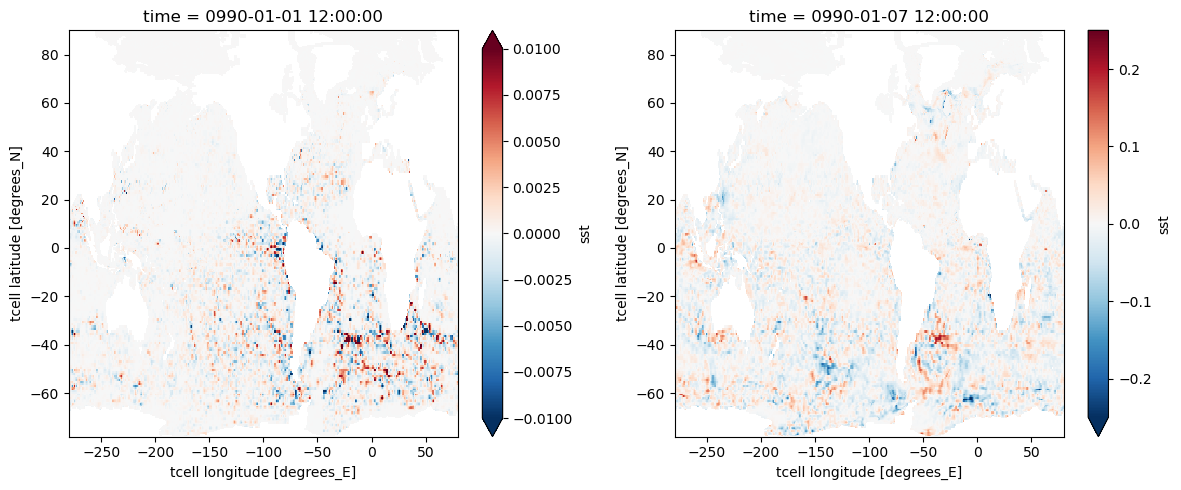

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
diff_sst[0].plot(ax=axs[0], cmap='RdBu_r', vmin = -0.01, vmax = 0.01)

# Plot second subplot
diff_sst[6].plot(ax=axs[1], cmap='RdBu_r', vmin = -0.25, vmax = 0.25)

plt.tight_layout()
plt.show()

Figure: Difference in SST for Ensemble member 1 - member 2 at day 1 (left), and day 30 (right). Ensemble member 2 had a random perturbation up to 10^-5 applied to the SST restoring file.

From the above plot it is clear that the simualtion is already diverging from the other ensemble member. To be sure, check September Year 1 and  January of year 2

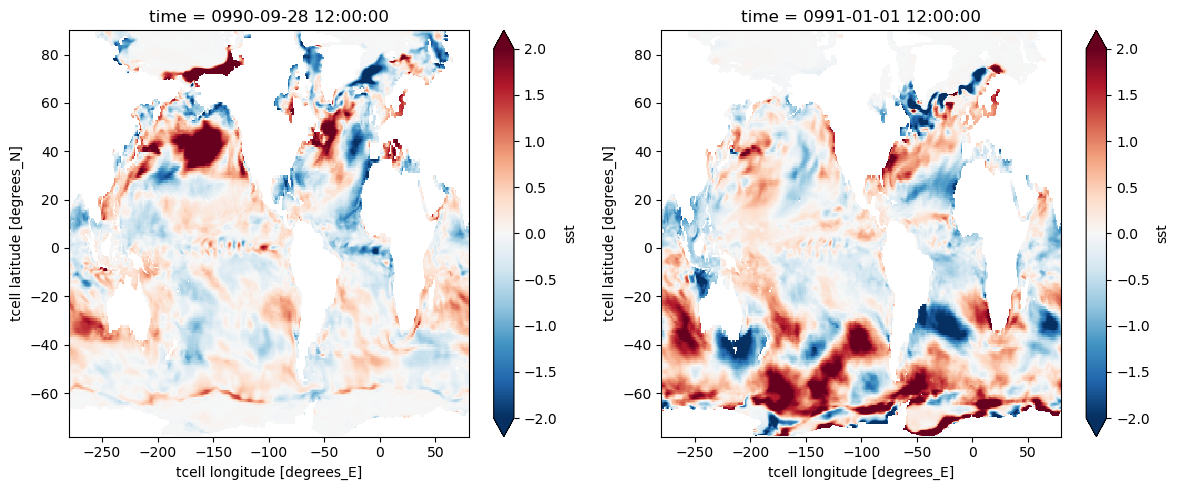

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
diff_sst[270].plot(ax=axs[0], cmap='RdBu_r', vmin = -2, vmax = 2)

# Plot second subplot
diff_sst[365].plot(ax=axs[1], cmap='RdBu_r', vmin = -2, vmax = 2)

plt.tight_layout()
plt.show()

Figure: Difference in SST for Ensemble member 1 - member 2 at day 269 (left), and day 366 (right). Ensemble member 2 had a random perturbation up to 10^-5 applied to the SST restoring file.

**<h3> Now lets double check the restoring pattern in the pacific is correct in both**

In [17]:
ctrl_daily = xr.open_mfdataset("/g/data/hh5/tmp/zg0866/cm000_APP4_archive_timefix/cm000/history/ocn/timefix_ocean_daily.nc-09901231",
                                 use_cftime=True, chunks = {"time":365})

In [18]:
ctrl_sst = ctrl_daily.sst

In [35]:
#convert the time to proleptic gregorian

In [36]:
ctrl_sst["time"] = CP_sst.time[:365]

In [37]:
diff_1 = CP_sst - ctrl_sst
diff_2 = CP_sst2 - ctrl_sst

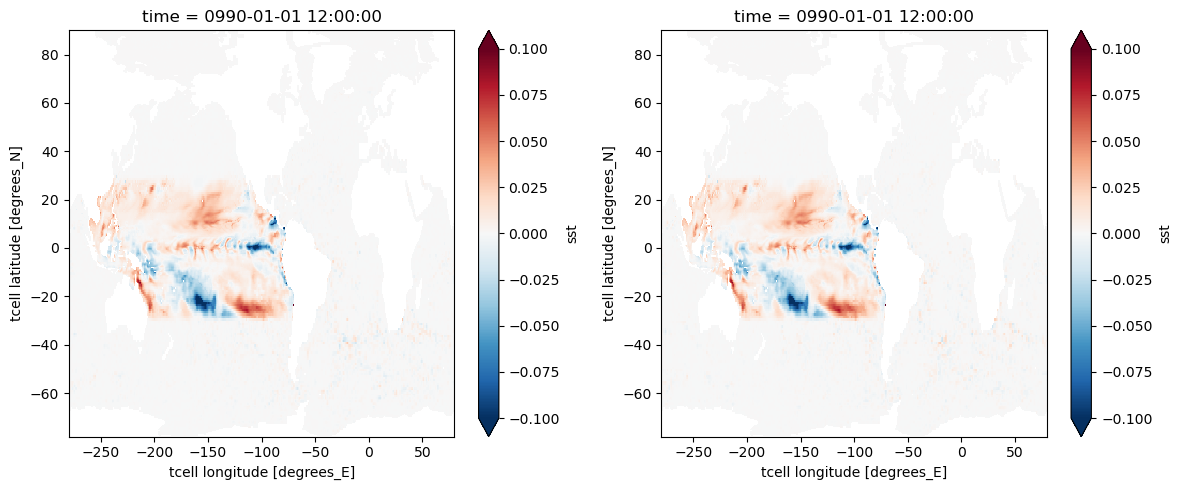

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
diff_1[0].plot(ax=axs[0], cmap='RdBu_r', vmin = -0.1, vmax = 0.1)

# Plot second subplot
diff_2[0].plot(ax=axs[1], cmap='RdBu_r', vmin = -0.1, vmax = 0.1)

plt.tight_layout()
plt.show()

Figure: Difference in SST between Ensemble member 1 and control simulation restart year  at day 1 (left). right hand plot is the same but for member 2.  
Ensemble member 2 had a random perturbation up to 10^-5 applied to the SST restoring file.

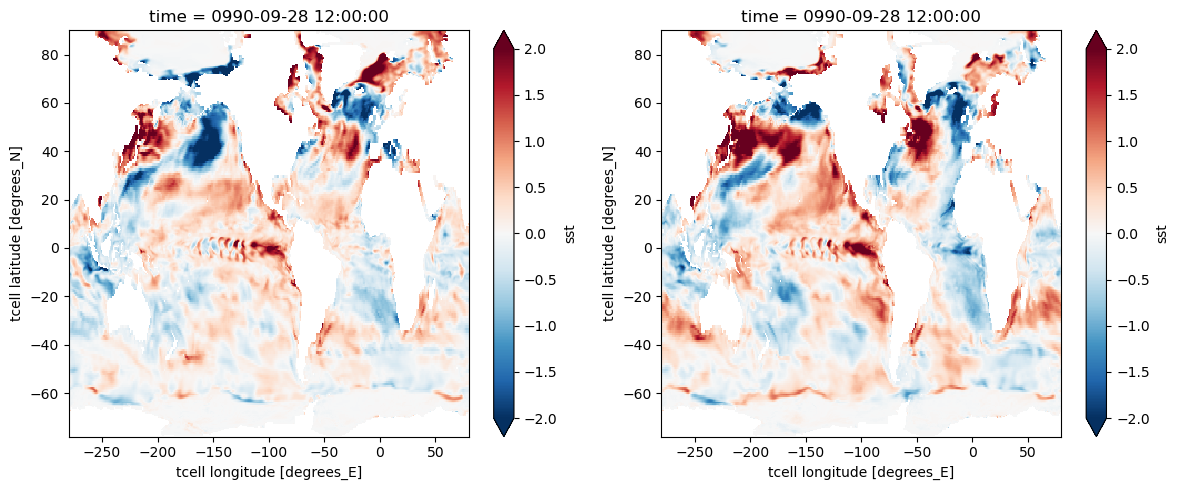

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
diff_1[270].plot(ax=axs[0], cmap='RdBu_r', vmin = -2, vmax = 2)

# Plot second subplot
diff_2[270].plot(ax=axs[1], cmap='RdBu_r', vmin = -2, vmax = 2)

plt.tight_layout()
plt.show()

Figure: Difference in SST between Ensemble member 1 and control simulation restart year at day 269 (left). right hand plot is the same but for member 2.  
Ensemble member 2 had a random perturbation up to 10^-5 applied to the SST restoring file.

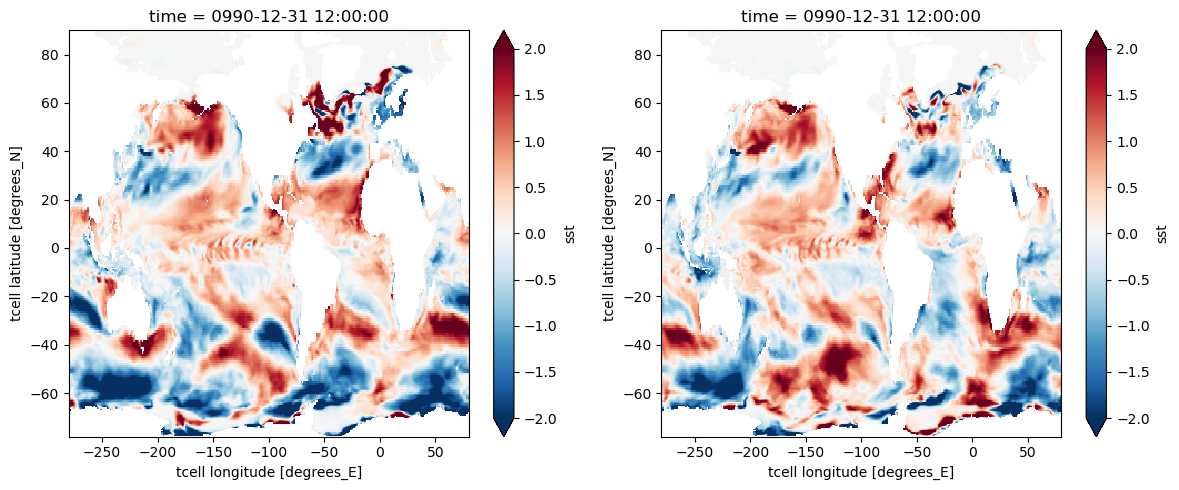

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
diff_1[364].plot(ax=axs[0], cmap='RdBu_r', vmin = -2, vmax = 2)

# Plot second subplot
diff_2[364].plot(ax=axs[1], cmap='RdBu_r', vmin = -2, vmax = 2)

plt.tight_layout()
plt.show()

Figure: Difference in SST between Ensemble member 1 and control simulation restart year at day 365 (left). right hand plot is the same but for member 2.  
Ensemble member 2 had a random perturbation up to 10^-5 applied to the SST restoring file.

**<h3> Now we need to check that theatmopshere responded differently to the perturbation**

In [45]:
CP_A1 = xr.open_mfdataset("/scratch/e14/sm2435/archive/dd756/history/atm/netCDF/dd756a.pm0990*", use_cftime=True)

In [46]:
CP_A2 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de760/history/atm/netCDF/de760a.pm0990*", use_cftime=True)

In [47]:
CTRL_A = xr.open_mfdataset("/g/data/hh5/tmp/zg0866/cm000_APP4_archive_timefix/cm000/history/atm/netCDF/cm000a.pm0990*",  use_cftime=True)

In [ ]:
#load in temp stash code = fld_s00i004

In [ ]:
A1_T = CP_A1.fld_s00i004

In [ ]:
A2_T = CP_A2.fld_s00i004

In [ ]:
CTRL_T = CTRL_A.fld_s00i004

In [46]:
#lets plot the month temp diff

In [53]:
A_diff = A2_T - A1_T

In [54]:
A_diff1 = A1_T - CTRL_T

In [55]:
A_diff2 = A2_T - CTRL_T

This is plot of difference at Month1 between the ensemble members for Theta at base of atm

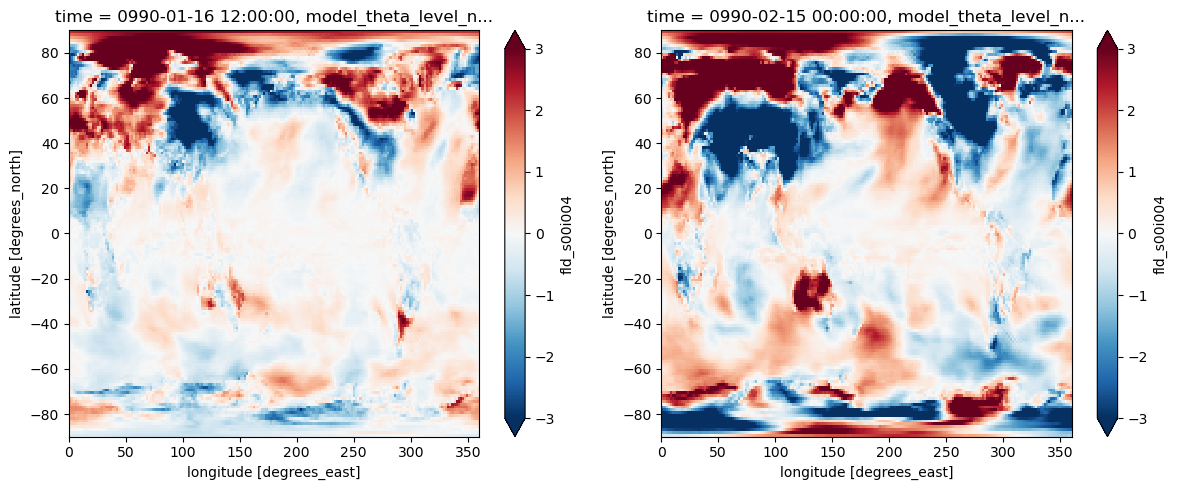

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
A_diff[0,0].plot(ax=axs[0], cmap='RdBu_r', vmin = -3, vmax = 3)

# Plot second subplot
A_diff[1,0].plot(ax=axs[1], cmap='RdBu_r', vmin = -3, vmax = 3)

plt.tight_layout()
plt.show()

Figure: Difference in Theta (atmopshere level 1000hPa) between Ensemble member 1 and member 2 month 1 (left) and month 2 (right).

This is plot of difference to the control at Month1 for the ensemble members for Theta at base of atm. it shows that the atmopsheric temperature is very different between the members, and diverges more through time.

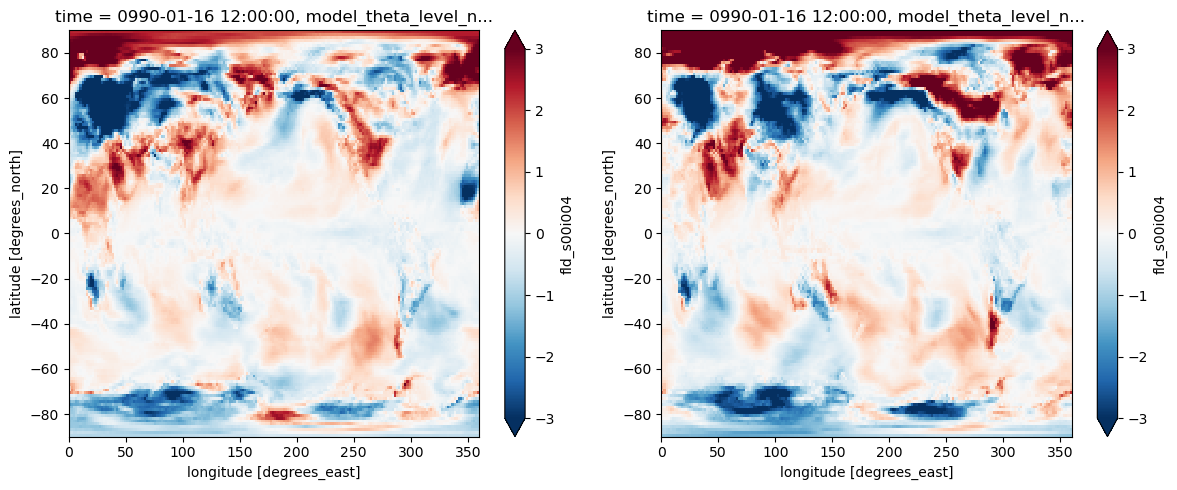

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
A_diff1[0,0].plot(ax=axs[0], cmap='RdBu_r', vmin = -3, vmax = 3)

# Plot second subplot
A_diff2[0,0].plot(ax=axs[1], cmap='RdBu_r', vmin = -3, vmax = 3)
plt.tight_layout()
plt.show()

Figure: difference in Theta for member 1 minus control (left and member 2 minus control (right) at month 1.

From the plot above, the two ensemble members are in similar atompsheric states, but still different. this indicates that the system is reponding in a similar way to restoring

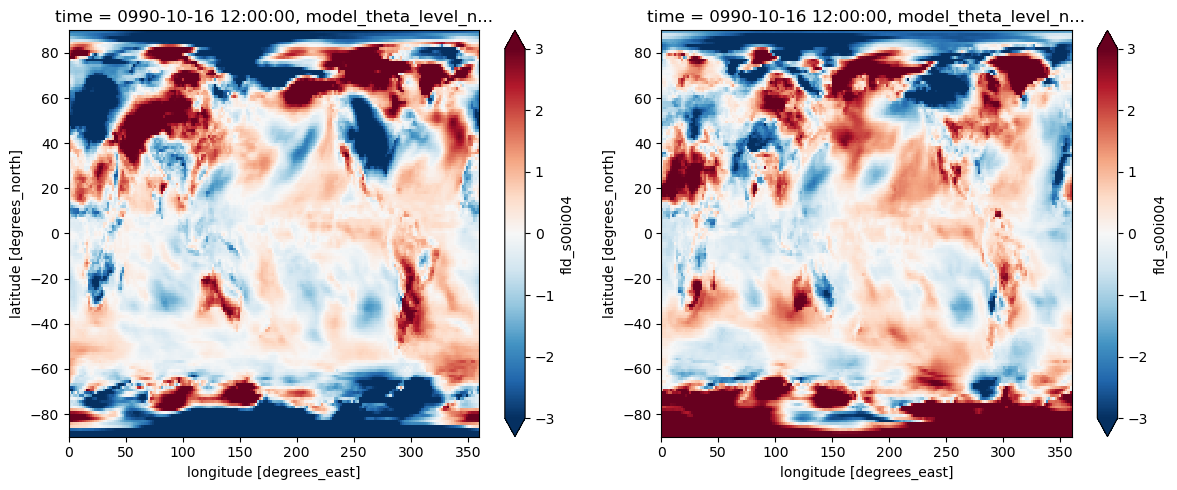

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
A_diff1[9,0].plot(ax=axs[0], cmap='RdBu_r', vmin = -3, vmax = 3)

# Plot second subplot
A_diff2[9,0].plot(ax=axs[1], cmap='RdBu_r', vmin = -3, vmax = 3)
plt.tight_layout()
plt.show()

Figure: difference in Theta for member 1 minus control (left and member 2 minus control (right) at month 10.

By october the atmosphere has diverged alot. There is a commone warming of temperature over tropical pacific, likly a result of the CP El Nino forcing.

<h3> Now time to check if the winds have a similar response

In [70]:
A1_u = CP_A1.fld_s30i201

In [72]:
A2_u = CP_A2.fld_s30i201

In [73]:
CTRL_u = CTRL_A.fld_s30i201

In [74]:
A_diffu = A2_u - A1_u

In [75]:
A_diffu1 = A1_u - CTRL_u

In [76]:
A_diffu2 = A2_u - CTRL_u

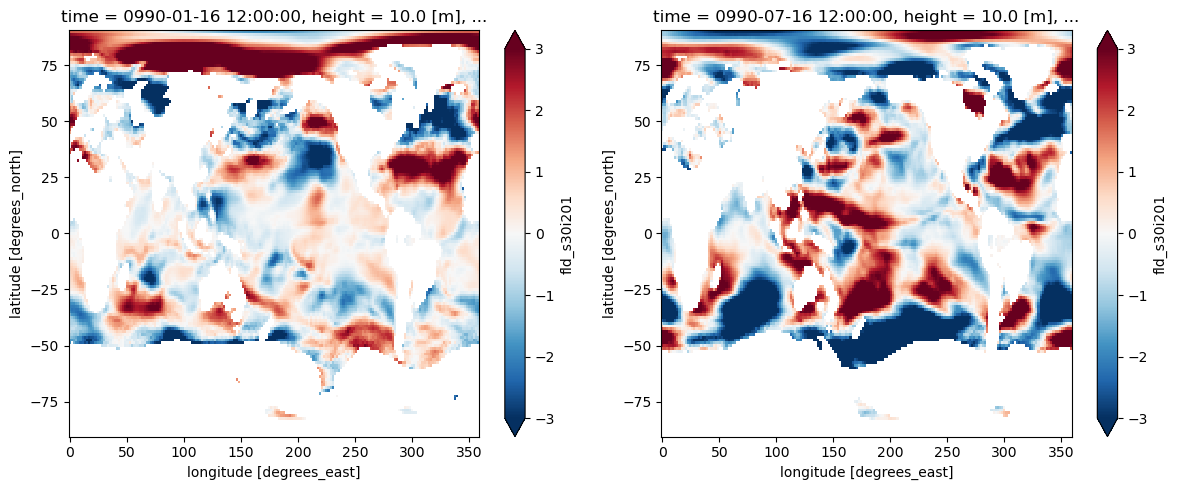

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
A_diffu[0,0].plot(ax=axs[0], cmap='RdBu_r', vmin = -3, vmax = 3)

# Plot second subplot
A_diffu[6,0].plot(ax=axs[1], cmap='RdBu_r', vmin = -3, vmax = 3)

plt.tight_layout()
plt.show()

Figure: Difference in zonal wind between ensemble member 1 and member 2 at month 1 (left) and month 7 (right)

Winds in the atmopshere diverge in the simualtion and indicate that the perturbation chnages the atmopshere too.

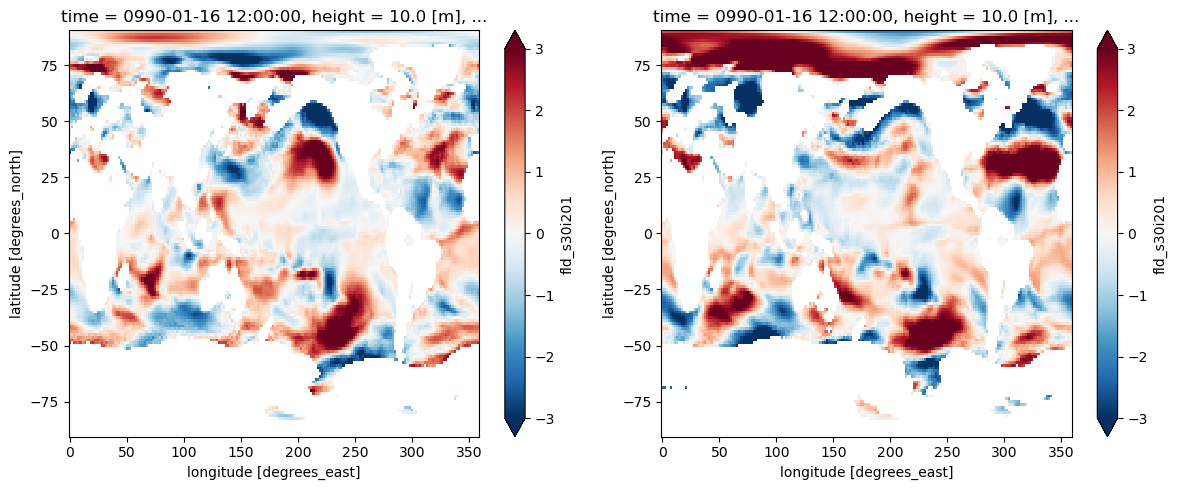

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
A_diffu1[0,0].plot(ax=axs[0], cmap='RdBu_r', vmin = -3, vmax = 3)

# Plot second subplot
A_diffu2[0,0].plot(ax=axs[1], cmap='RdBu_r', vmin = -3, vmax = 3)
plt.tight_layout()
plt.show()

Figure: difference between member 1 and control for U winds at month1 (left). Same for right but for member 2.

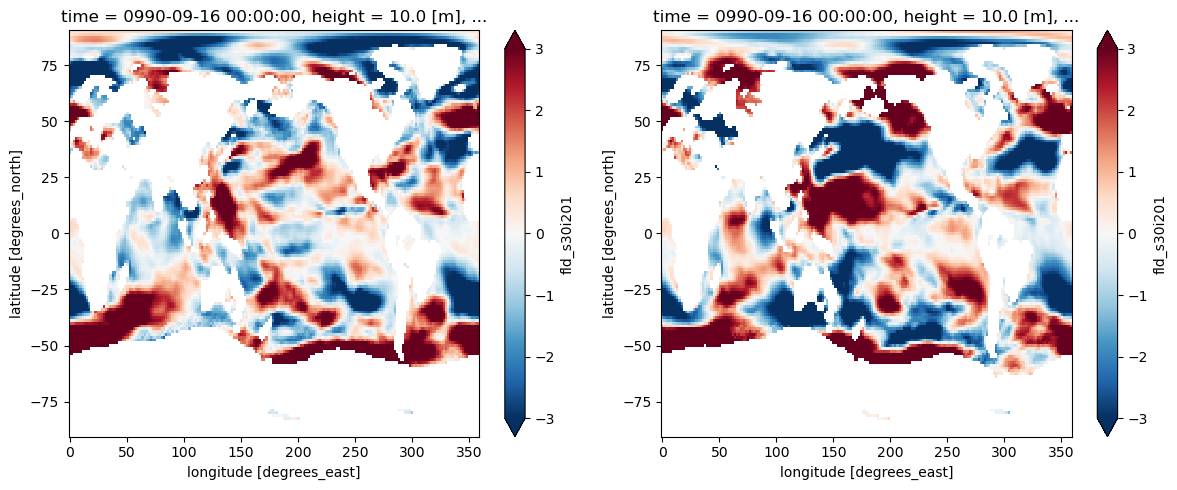

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
A_diffu1[8,0].plot(ax=axs[0], cmap='RdBu_r', vmin = -3, vmax = 3)

# Plot second subplot
A_diffu2[8,0].plot(ax=axs[1], cmap='RdBu_r', vmin = -3, vmax = 3)
plt.tight_layout()
plt.show()

Figure: difference between member 1 and control for U winds at September (left). Same for right but for member 2.

This plot here shows that both members have different atmopsheric responses globally. There is however a common increase in easterly winds along the equator in the pacific. Also note the dipole structure over the IO in the right hand plot, indicating the IOD is likely stronger too.

**<h1>Now time to load in the monthly SST and analyse the DMI

In [3]:
#load in ctrl dataset
ctrl_sst = xr.open_dataset("/g/data/e14/sm2435/Exps_ACCESS_initial/ctrl_sst.nc",  use_cftime=True, chunks= {"time":240})
ctrl = ctrl_sst.sst.compute()

In [4]:
def roll_lon(df):
    df.coords['xt_ocean'] = (df.coords['xt_ocean'] + 360) % 360# - 180
    df = df.sortby(df.xt_ocean)
    return df

In [5]:
ctrl = roll_lon(ctrl)

In [6]:
exp_dir = "/scratch/e14/sm2435/archive/"

In [7]:
suffix = "/history/ocn/ocean_month.nc*"

In [8]:
CP_had_ens_list = ["dd756", "de760", "de420", "de419", "de421", "de422", "de696", "de697", "de698", "de699"]

In [9]:
new_time = ctrl.time[0:24]

In [10]:
CP_had_ens={}
for exp in CP_had_ens_list:
    ds = xr.open_mfdataset(exp_dir+exp+suffix, use_cftime=True, chunks= {"time":12})
    sst = ds.sst
    sst = roll_lon(sst)
    #change the time to 0000
    sst['time'] = new_time
    CP_had_ens[exp] = sst

In [11]:
def ssta(DS):
    clim = DS.groupby('time.month').mean('time')
    ssta = DS.groupby('time.month') - clim
    return ssta.drop("month")
def DMI_ctrl(DS):
    WTIO =  ssta(DS).sel(yt_ocean=slice(
         -10, 10),xt_ocean=slice(50, 70)).mean(['yt_ocean', 'xt_ocean'])
    SETIO =  ssta(DS).sel(yt_ocean=slice(
         -10, 0),xt_ocean=slice(90, 110)).mean(['yt_ocean', 'xt_ocean'])
    return (WTIO - SETIO)

def DMI_exp(DS):
    WTIO =  (DS).sel(yt_ocean=slice(
         -10, 10),xt_ocean=slice(50, 70)).mean(['yt_ocean', 'xt_ocean'])
    SETIO =  (DS).sel(yt_ocean=slice(
         -10, 0),xt_ocean=slice(90, 110)).mean(['yt_ocean', 'xt_ocean'])
    return (WTIO - SETIO)

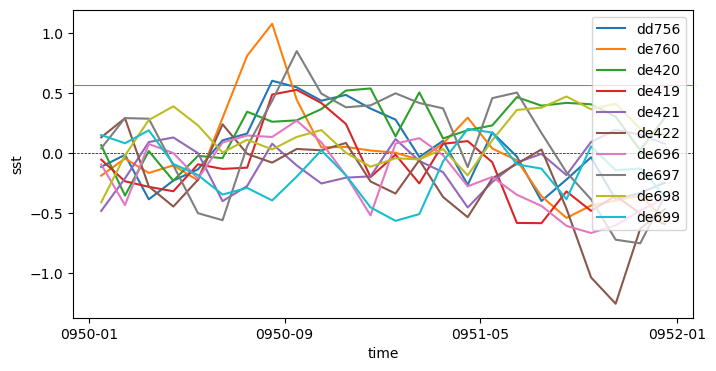

In [12]:
#plot figure
plt.figure(figsize = (8,4))
#now plot the 0 line and DMI threshold line
plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
for key in CP_had_ens.keys():
    sst = CP_had_ens[key]
    SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    dmi = DMI_exp(SSTA)
    dmi.plot(label = key)
plt.legend()


de760 and dd756 are equivalent members with the perturbation (ornage and blue). All the other members are different restart years

In [151]:
#lets check the Nino4 index makes sense

In [185]:
def NINO4(DS):
    N4 =  (DS).sel(yt_ocean=slice(
         -10, 10),xt_ocean=slice(160, 210)).mean(['yt_ocean', 'xt_ocean'])
    return N4

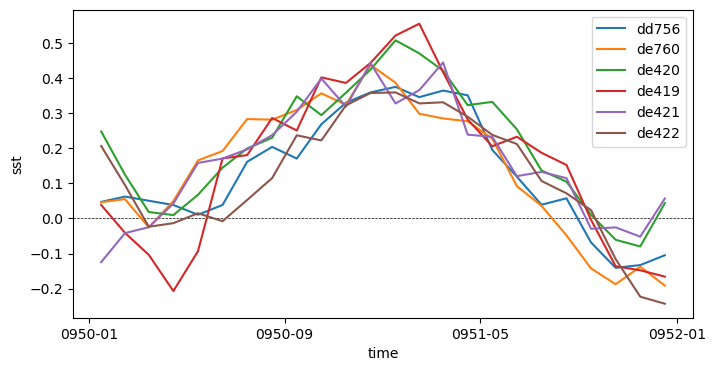

In [186]:
#plot figure
plt.figure(figsize = (8,4))
#now plot the 0 line and DMI threshold line
#plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
for key in CP_had_ens.keys():
    sst = CP_had_ens[key]
    SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    nino4 = NINO4(SSTA)
    nino4.plot(label = key)
plt.legend()


de760 and dd756 are equivalent members with the perturbation (ornage and blue). All the other members are different restart years

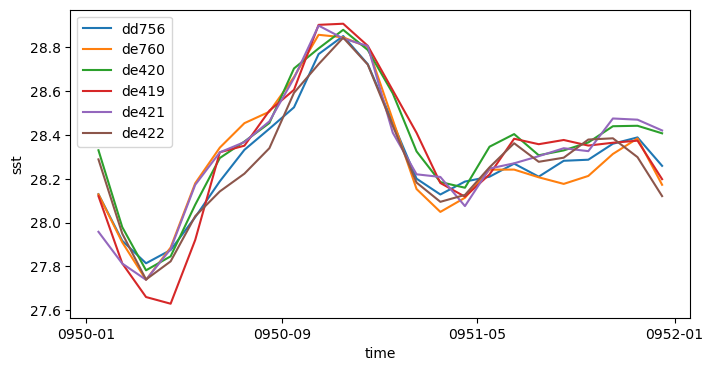

In [188]:
#plot figure
plt.figure(figsize = (8,4))
#now plot the 0 line and DMI threshold line
#plt.axhline(DMI_ctrl(ctrl).groupby("time.season")["SON"].std("time").values, lw = 0.5, color = 'r')
#plt.axhline(0, lw = 0.5, ls = "--", color = 'k')
for key in CP_had_ens.keys():
    sst = CP_had_ens[key]
    #SSTA = sst.groupby("time.month") - ctrl.groupby("time.month").mean("time")
    #give the
    nino4 = NINO4(sst)
    nino4.plot(label = key)
plt.legend()


Absolute SST in Nino4 region

<h4> load in restoring file to triple check they are identical outside of month1 perturbation

In [11]:
#load in SST files and double check they are the same:
CP1 = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/Mod_ENSO/0990/CP_elnino_0990.nc", decode_times = False)

In [12]:
CP2 = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/Mod_ENSO_pert/0990/CP_elnino_0990.nc", decode_times = False)

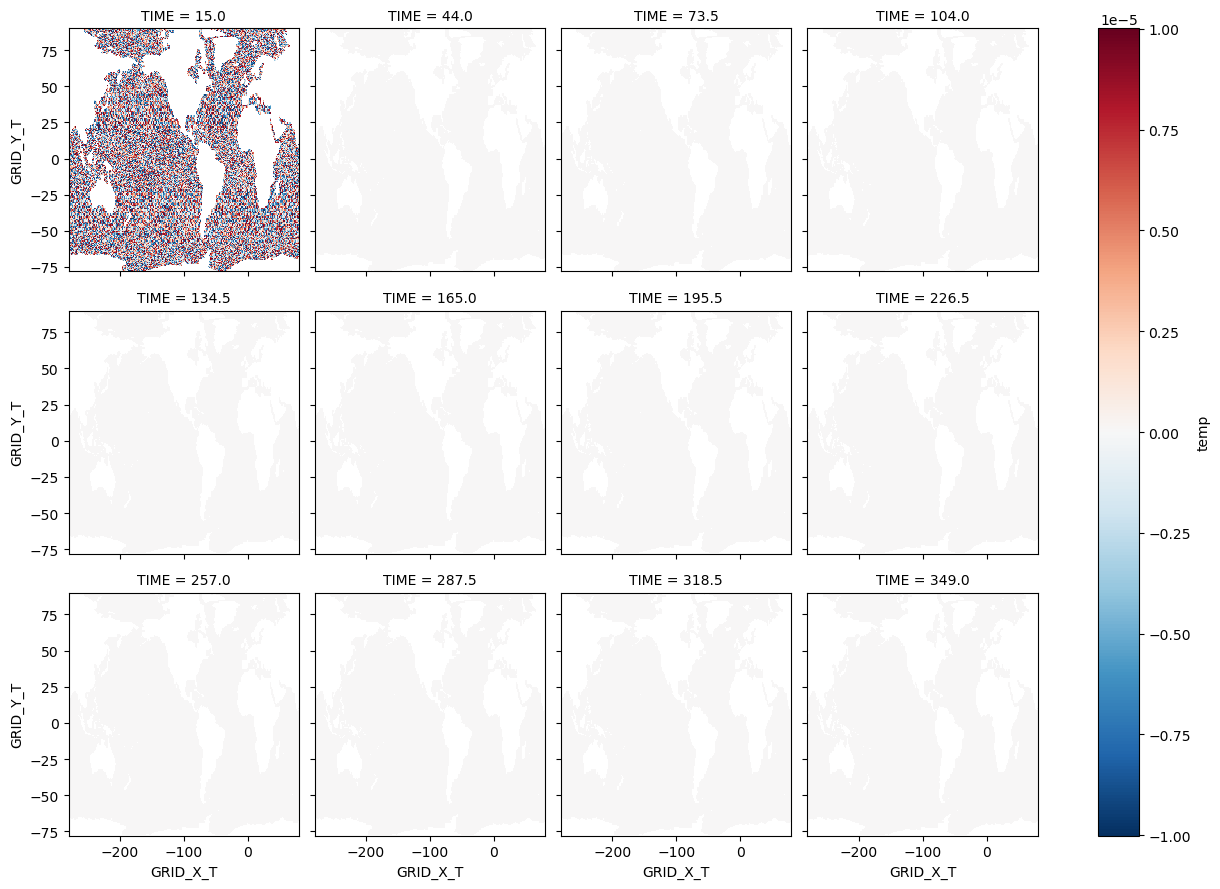

In [13]:
(CP1.temp[0] - CP2.temp[0]).plot(col = "TIME", col_wrap = 4)


In [14]:
EP1 = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/Mod_ENSO/0990/EP_elnino_0990.nc", decode_times = False)

In [15]:
EP2 = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/Mod_ENSO_pert/0990/EP_elnino_0990.nc", decode_times = False)

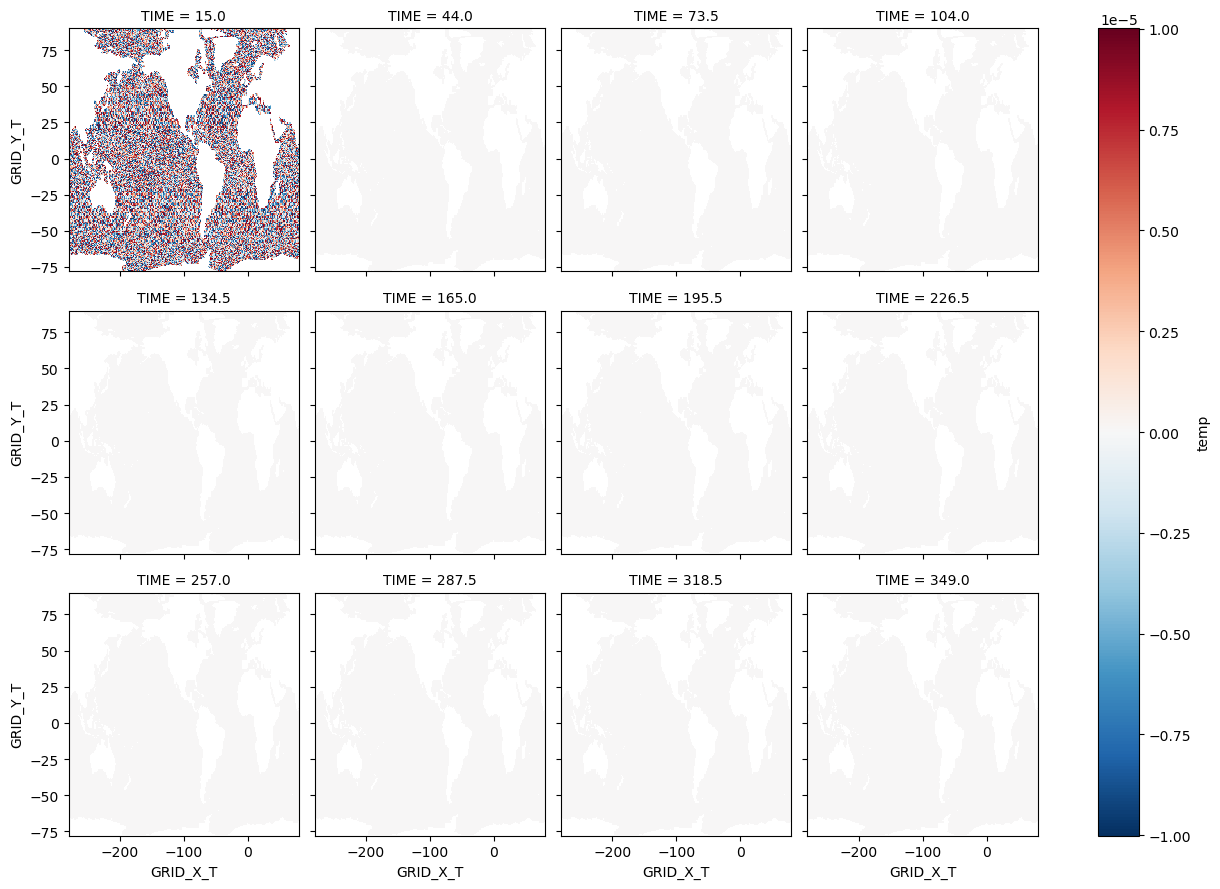

In [16]:
(EP1.temp[0] - EP2.temp[0]).plot(col = "TIME", col_wrap = 4)


In [189]:
5e17/30/60/60

4629629629629.63